In [2]:
! gdown https://drive.google.com/uc?id=1v6OrkkX0kDhKdgtH7KONabaWaccnFSZp
! gdown https://drive.google.com/uc?id=1Z4cvkBBY7hEpQ_LPhv93ke0OTh9xC3Jb
! gdown https://drive.google.com/uc?id=1vtgX6RWCcN0kBqCczHqRCf6PNNI9RrNY
! gdown https://drive.google.com/uc?id=1GKIqv9xnkb9OgkljAUcxkbU-RmRji4zF
! gdown https://drive.google.com/uc?id=1hn0oYQsJm4N8k4MlMvRMnzizKtNKp9Hb

Downloading...
From: https://drive.google.com/uc?id=1v6OrkkX0kDhKdgtH7KONabaWaccnFSZp
To: /content/games_details.csv
100% 84.3M/84.3M [00:01<00:00, 61.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z4cvkBBY7hEpQ_LPhv93ke0OTh9xC3Jb
To: /content/games.csv
100% 3.72M/3.72M [00:00<00:00, 17.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vtgX6RWCcN0kBqCczHqRCf6PNNI9RrNY
To: /content/players.csv
100% 266k/266k [00:00<00:00, 2.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GKIqv9xnkb9OgkljAUcxkbU-RmRji4zF
To: /content/ranking.csv
100% 13.9M/13.9M [00:00<00:00, 52.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hn0oYQsJm4N8k4MlMvRMnzizKtNKp9Hb
To: /content/teams.csv
100% 4.06k/4.06k [00:00<00:00, 7.67MB/s]


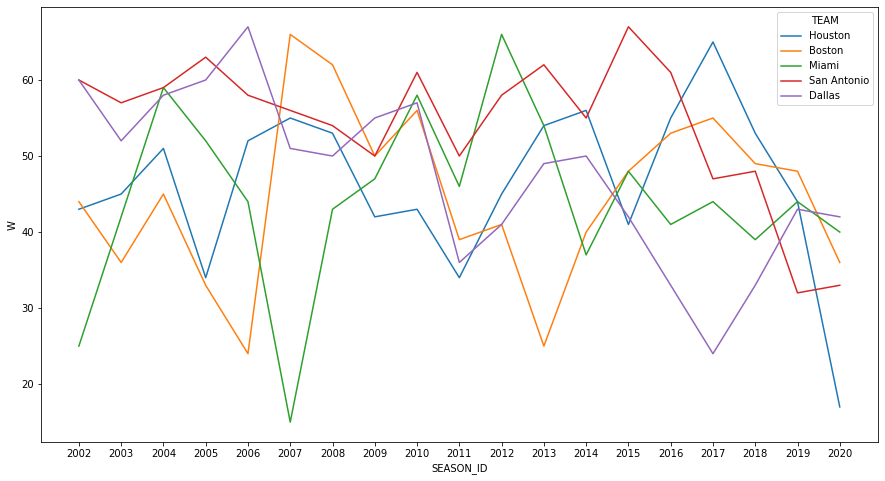

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('ranking.csv')
#clean up data and sort by year and teams
data['SEASON_ID'] = data['SEASON_ID'].apply(str).str[1:]
data.drop_duplicates(subset =['SEASON_ID',"TEAM"] , inplace = True)
data = data.sort_values(by='SEASON_ID')

#Get top 5 performing teams by summing all wins
best_teams = list(data.groupby(['TEAM'])[['W']].sum().sort_values(by='W',ascending = False)[:5].index)
data = data[data.TEAM.isin(best_teams)]

#plot wins for each year for 5 best performing teams
plt.figure(figsize=(15,8))
sns.lineplot(data=data , x = 'SEASON_ID', y = 'W' , hue = 'TEAM')

Enter your value: GSW


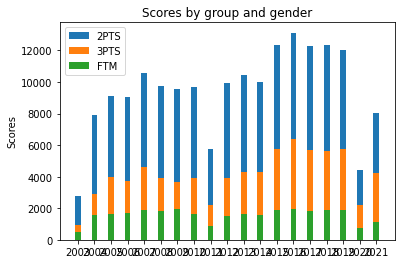

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#first file
game_details = pd.read_csv('games_details.csv')
sumgame = game_details.groupby(['GAME_ID','TEAM_ABBREVIATION'],as_index=False)[['FG3M','FTM','PTS']].sum()
sumgame['PTS'] = sumgame['PTS'] - (3*sumgame['FG3M']) - sumgame['FTM']
sumgame['FG3M'] = sumgame['FG3M'] *3
sumgame.rename(columns={'FG3M':'3PTS','PTS':'2PTS'}, inplace=True)

#second file
games = pd.read_csv('games.csv')
games['GAME_DATE_EST'] = games['GAME_DATE_EST'].str[:4]
games = games[['GAME_DATE_EST','GAME_ID']]
games = pd.merge(games, sumgame, on=['GAME_ID'])
#final piece
final_data = games.groupby(['GAME_DATE_EST','TEAM_ABBREVIATION'],as_index=False)[['3PTS','FTM','2PTS']].sum()
val = input("Enter your value: ")
final_data = final_data[final_data['TEAM_ABBREVIATION'] == val] 

#plot
fig, ax = plt.subplots()
width = 0.35  
ax.bar(final_data['GAME_DATE_EST'], final_data['2PTS'] +  final_data['FTM'] + final_data['3PTS'], width,label='2PTS')
ax.bar(final_data['GAME_DATE_EST'], final_data['3PTS'] + final_data['FTM'], width,label='3PTS')
ax.bar(final_data['GAME_DATE_EST'], final_data['FTM'] , width,label='FTM')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

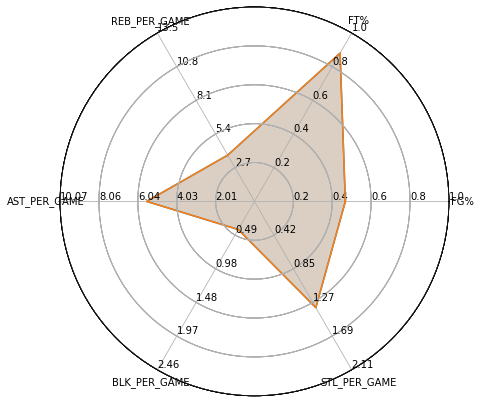

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import traceback
import itertools

try:
  data1 = pd.read_csv('games_details.csv')

  data1['MIN'] = data1['MIN'].str.split(':', expand=True).astype(float)
  data = data1.groupby(['PLAYER_NAME'],as_index=False)[['FTA','FTM','FGA','FGM','REB','AST','STL','BLK','MIN']].sum()
  games = data1.groupby(['PLAYER_NAME'],as_index=False)[['FTA','FTM','FGA','FGM','REB','AST','STL','BLK']].count()

  data = data[data['MIN'] > 60]  
  players_stat = pd.DataFrame(columns=[])
  players_stat['PLAYER_NAME'] = data['PLAYER_NAME']
  players_stat['FG%'] = data['FGM']/data['FGA']
  players_stat['FT%'] = data['FTM']/data['FTA']
  players_stat['REB_PER_GAME'] = (data['REB']/games['REB'])
  players_stat['AST_PER_GAME'] = (data['AST']/games['AST'])
  players_stat['BLK_PER_GAME'] = (data['BLK']/games['BLK'])
  players_stat['STL_PER_GAME'] = (data['STL']/games['STL'])

  players_stat.replace([np.inf, -np.inf], np.nan,inplace=True)
  players_stat.fillna(0)
  # first = input("Enter your first player: ")
  # second = input("Enter your second player: ")
  first = 'Kyrie Irving'
  second = 'Kyrie Irving'
  players_stat_indiv1 = players_stat[players_stat['PLAYER_NAME'] == first]
  players_stat_indiv2 = players_stat[players_stat['PLAYER_NAME'] == second]

  data = []
  data2 = []
  df = players_stat_indiv1.values.tolist()
  for i in df:
    for j in i[1:]:
      data.append(j)
  data = tuple(data)

  df = players_stat_indiv2.values.tolist()
  for i in df:
    for j in i[1:]:
      data2.append(j)
  data2 = tuple(data2)
  # plot

  def _invert(x, limits):
      """inverts a value x on a scale from
      limits[0] to limits[1]"""
      print(x,limits)
      return limits[1] - (x - limits[0])

  def _scale_data(data, ranges):
      """scales data[1:] to ranges[0],
      inverts if the scale is reversed"""
      for d, (y1, y2) in zip(data[1:], ranges[1:]):
          assert (y1 <= d <= y2) or (y2 <= d <= y1)
      x1, x2 = ranges[0]
      d = data[0]
      if x1 > x2:
          d = _invert(d, (x1, x2))
          x1, x2 = x2, x1
      sdata = [d]
      for d, (y1, y2) in zip(data[1:], ranges[1:]):
          if y1 > y2:
              d = _invert(d, (y1, y2))
              y1, y2 = y2, y1
          sdata.append((d-y1) / (y2-y1) 
                      * (x2 - x1) + x1)
      return sdata

  class ComplexRadar():
      def __init__(self, fig, variables, ranges,
                  n_ordinate_levels=6):
          angles = np.arange(0, 360, 360./len(variables))

          axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                  label = "axes{}".format(i)) 
                  for i in range(len(variables))]
          l, text = axes[0].set_thetagrids(angles, 
                                          labels=variables)
          [txt.set_rotation(angle-90) for txt, angle 
              in zip(text, angles)]
          for ax in axes[1:]:
              ax.patch.set_visible(False)
              ax.grid("off")
              ax.xaxis.set_visible(False)
          for i, ax in enumerate(axes):
              grid = np.linspace(*ranges[i], 
                                num=n_ordinate_levels)
              gridlabel = ["{}".format(round(x,2)) 
                          for x in grid]
              if ranges[i][0] > ranges[i][1]:
                  grid = grid[::-1] # hack to invert grid
                            # gridlabels aren't reversed
              gridlabel[0] = "" # clean up origin
              
              ax.set_rgrids(grid, labels=gridlabel,
                          angle=angles[i])
              #ax.spines["polar"].set_visible(False)
              ax.set_ylim(*ranges[i])
          # variables for plotting
          self.angle = np.deg2rad(np.r_[angles, angles[0]])
          self.ranges = ranges
          self.ax = axes[0]
      def plot(self, data, *args, **kw):
          sdata = _scale_data(data, self.ranges)
          self.ax.plot(self.angle, np.r_[sdata, sdata[0]],*args, **kw)
      def fill(self, data, *args, **kw):
          sdata = _scale_data(data, self.ranges)
          self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
  # example data
  variables = ('FG%','FT%','REB_PER_GAME','AST_PER_GAME','BLK_PER_GAME','STL_PER_GAME')    
  data = data
  ranges = [(0, players_stat['FG%'].max()), (0, players_stat['FT%'].max()), (0, players_stat['REB_PER_GAME'].max()),
         (0, players_stat['AST_PER_GAME'].max()), (0, players_stat['BLK_PER_GAME'].max()), (0, players_stat['STL_PER_GAME'].max())]       
  # plotting
  fig1 = plt.figure(figsize=(6, 6))
  radar = ComplexRadar(fig1, variables, ranges)
  radar.plot(data)
  radar.plot(data2)
  radar.fill(data, alpha=0.2)
  radar.fill(data2, alpha=0.2)
  plt.style.use('default')
  plt.grid('on')
  plt.show()

except AssertionError:
    _, _, tb = sys.exc_info()
    traceback.print_tb(tb) # Fixed format
    tb_info = traceback.extract_tb(tb)
    filename, line, func, text = tb_info[-1]
    print('An error occurred on line {} in statement {}'.format(line, text))
    exit(1)